In [1]:
from DQN import *
env = TictactoeEnv()
num_episodes = 20000

In [2]:
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "simple_white"

In [68]:
pio.templates[pio.templates.default].layout.colorway =  ['#ffa822','#134e6f','#ff6150','#1ac0c6','#9d1552']

In [92]:
colors =  ['#ffa822','#6e3d0f','#ff6150','#1ac0c6','#309d15','#4c159d']

# Learning from Experts

## Q11

In [4]:
num_episodes = 20000
plot_interval = 250
epsilon = [0,0.2,0.4,0.6,0.8]
all_rewards = []
all_training_losses = []
for eps in epsilon:
    rewards,training_loss,_,_,p1= play_games(env,num_episodes,eps,test)
    all_rewards.append(rewards)
    all_training_losses.append(training_loss)

100%|██████████| 20000/20000 [02:24<00:00, 138.82it/s]


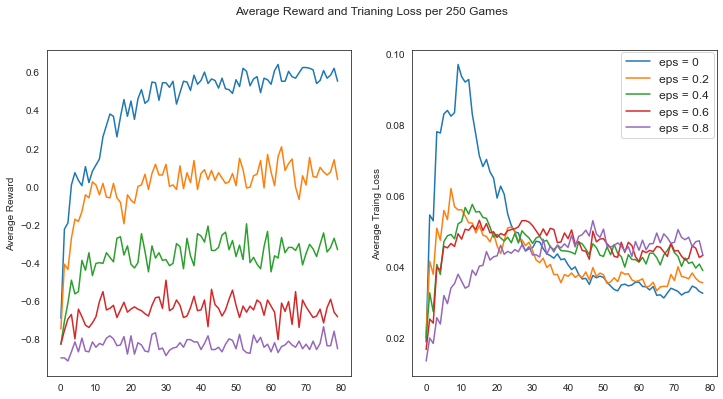

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))
plot_interval = 250
for i in range(len(epsilon)):
    avg_reward = all_rewards[i].reshape(-1,plot_interval).mean(axis=1)    
    avg_loss= np.array(all_training_losses[i][plot_interval:]).reshape(-1,plot_interval).mean(axis=1)  
    ax1.plot(range(avg_reward.shape[0]), avg_reward,label='eps = '+ str(epsilon[i]))
    ax2.plot(range(avg_loss.shape[0]), avg_loss,label='eps = '+ str(epsilon[i]))
    
ax2.set_ylabel('Average Traing Loss')
ax1.set_ylabel('Average Reward')
fig.suptitle('Average Reward and Trianing Loss per 250 Games')
plt.legend(bbox_to_anchor=(1.01, 1.01), fontsize=12)
plt.show()

In [37]:
fig = make_subplots(rows=1, cols=2)

for i in range(len(epsilon)):
    avg_reward = all_rewards[i].reshape(-1,plot_interval).mean(axis=1)    
    avg_loss= np.array(all_training_losses[i][plot_interval:]).reshape(-1,plot_interval).mean(axis=1)
    fig.add_trace(go.Scatter(x=list(range(avg_reward.shape[0])), y= avg_reward,name='eps = '+ str(epsilon[i]), legendgroup=i+1),row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(avg_loss.shape[0])), y= avg_loss,name='eps = '+ str(epsilon[i]),legendgroup=i+1),row=1, col=2)
    

fig.update_layout(height=600, width=1000, title_text='Average Reward and Trianing Loss per 250 Games')
fig.show()

## Q12

In [8]:
num_episodes = 20000
plot_interval = 250
epsilon = [0,0.2,0.4,0.6,0.8]
all_rewards1= []
all_training_losses1 = []
for eps in epsilon:
    rewards,training_loss,_,_ ,p2= play_games(env,num_episodes,eps,batch=False)
    all_rewards1.append(rewards)
    all_training_losses1.append(training_loss)

100%|██████████| 20000/20000 [02:06<00:00, 158.30it/s]


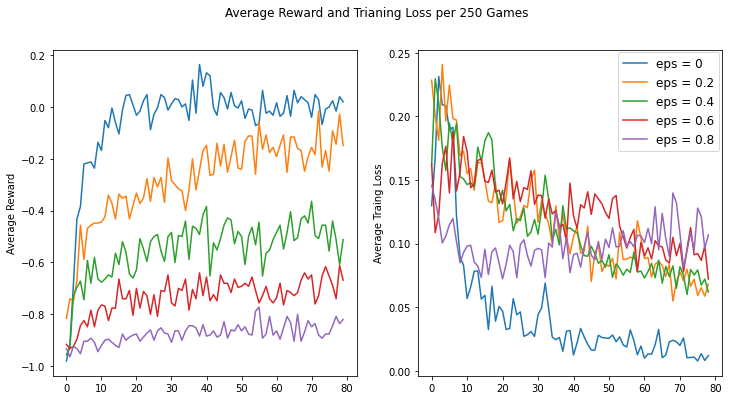

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))
plot_interval = 250
for i in range(len(epsilon)):
    avg_reward = all_rewards1[i].reshape(-1,plot_interval).mean(axis=1)    
    avg_loss= np.array(all_training_losses1[i][plot_interval:]).reshape(-1,plot_interval).mean(axis=1)  
    ax1.plot(range(avg_reward.shape[0]), avg_reward,label='eps = '+ str(epsilon[i]))
    ax2.plot(range(avg_loss.shape[0]), avg_loss,label='eps = '+ str(epsilon[i]))
    
ax2.set_ylabel('Average Traing Loss')
ax1.set_ylabel('Average Reward')
fig.suptitle('Average Reward and Trianing Loss per 250 Games')
plt.legend(bbox_to_anchor=(1.01, 1.01), fontsize=12)
plt.show()

In [38]:
fig = make_subplots(rows=1, cols=2)

for i in range(len(epsilon)):
    avg_reward = all_rewards1[i].reshape(-1,plot_interval).mean(axis=1)    
    avg_loss= np.array(all_training_losses1[i][plot_interval:]).reshape(-1,plot_interval).mean(axis=1)
    fig.add_trace(go.Scatter(x=list(range(avg_reward.shape[0])), y= avg_reward,name='eps = '+ str(epsilon[i]), legendgroup=i+1),row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(avg_loss.shape[0])), y= avg_loss,name='eps = '+ str(epsilon[i]),legendgroup=i+1),row=1, col=2)
    

fig.update_layout(height=600, width=1000, title_text='Average Reward and Trianing Loss per 250 Games without Replay')
fig.show()

## Q13


In [16]:
n_stars = [1, 100, 1000, 5000, 10000, 20000]

In [17]:
all_rewards2 = []
all_training_losses2 = []
M_opts2 =[]
M_rands2 = []
for n_star in n_stars:
    rewards,training_loss,M_opt,M_rand,p3 = play_games(env,num_episodes,batch=True,decay=True,nstar=n_star,test=True,Print=False)
    all_rewards2.append(rewards)
    all_training_losses2.append(training_loss)
    M_opts2.append(M_opt)
    M_rands2.append(M_rand)


100%|██████████| 20000/20000 [07:32<00:00, 44.20it/s] 


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))
for i in range(len(n_stars)):
    if i!=4 and i!=3:
        ax1.plot(range(len(M_opts2[i])), M_opts2[i],label='n* = '+ str(n_stars[i]))
        ax2.plot(range(len(M_rands2[i])), M_rands2[i],label='n* = '+ str(n_stars[i]))

ax2.set_ylabel('M_rand')
ax1.set_ylabel('M_opt')
fig.suptitle('M_opt and M_rand per 250 Games with Varying n*')
plt.legend(bbox_to_anchor=(1.01, 1.01), fontsize=12)
plt.show()

In [116]:
fig = make_subplots(rows=1, cols=2)

for i in range(len(n_stars)):
    avg_reward = all_rewards2[i].reshape(-1,plot_interval).mean(axis=1)    
    avg_loss= np.array(all_training_losses2[i][plot_interval:]).reshape(-1,plot_interval).mean(axis=1)
    fig.add_trace(go.Scatter(x=list(range(avg_reward.shape[0])), y= avg_reward,name='nstars = '+ str(n_stars[i]), legendgroup=i+1),row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(avg_loss.shape[0])), y= avg_loss,name='nstars = '+ str(n_stars[i]),legendgroup=i+1),row=1, col=2)
    

fig.update_layout(height=600, width=1000, title_text='Average Reward and Trianing Loss per 250 Games with Varying n*')
fig.show()

In [115]:
fig = go.Figure()
for i in [0,2,3,4,5]:
    fig.add_trace(go.Scatter(x=list(range(len(M_opts2[i]))), y=M_opts2[i],
                    mode='lines',line = dict(color = colors[i]),
                    name='Mopt n* = '+ str(n_stars[i]), legendgroup=i+1))
    fig.add_trace(go.Scatter(x=list(range(len(M_rands2[i]))), y=M_rands2[i],
                     line = dict(dash='dash',color = colors[i]),
                    name='Mrand n* = '+ str(n_stars[i]), legendgroup=i+1))
fig.update_layout(template="simple_white", width=800,height=500)

fig.show()

Achieving 0.954 at 58 for n*=1, and at 74 for n*=5000

## Q14

In [127]:
eps_opts = [0,0.2,0.4,0.6,0.8,1]
all_rewards_ep = []
all_training_losses_ep = []
M_opts_ep =[]
M_rands_ep = []
n_star = 1
for eps_opt in eps_opts:
    rewards,training_loss,M_opt,M_rand,p4 = play_games(env,num_episodes,opts_epsilon=eps_opt,batch=True,decay=True,nstar=n_star,test=True,Print=False)
    all_rewards_ep.append(rewards)
    all_training_losses_ep.append(training_loss)
    M_opts_ep.append(M_opt)
    M_rands_ep.append(M_rand)

100%|██████████| 20000/20000 [07:10<00:00, 46.45it/s] 


check with n*=1

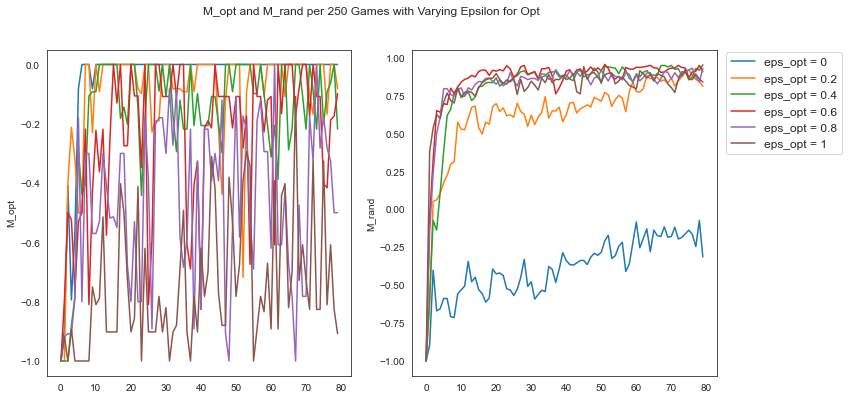

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))
for i in range(len(eps_opts)):
    ax1.plot(range(len(M_opts_ep[i])), M_opts_ep[i],label='eps_opt = '+ str(eps_opts[i]))
    ax2.plot(range(len(M_rands_ep[i])), M_rands_ep[i],label='eps_opt = '+ str(eps_opts[i]))
    
ax2.set_ylabel('M_rand')
ax1.set_ylabel('M_opt')
fig.suptitle('M_opt and M_rand per 250 Games with Varying Epsilon for Opt')
plt.legend(bbox_to_anchor=(1.01, 1.01), fontsize=12)
plt.show()

In [129]:
fig = go.Figure()
for i in [0,1,2,3,4,5]:
    fig.add_trace(go.Scatter(x=list(range(len(M_opts_ep[i]))), y=M_opts_ep[i],
                    mode='lines',line = dict(color = colors[i]),
                    name='M_opt opt eps = '+ str(eps_opts[i]), legendgroup=i+1))
    fig.add_trace(go.Scatter(x=list(range(len(M_rands_ep[i]))), y=M_rands_ep[i],
                     line = dict(dash='dash',color = colors[i]),
                    name='M_rand opt eps = '+ str(eps_opts[i]), legendgroup=i+1))
    
fig.update_layout(template="simple_white", width=800,height=500)

fig.show()

achieving 0.954 at 51 for 0.6

check with n*=1000

In [78]:
eps_opts = [0,0.2,0.4,0.6,0.8,1]
all_rewards_ep = []
all_training_losses_ep = []
M_opts_ep =[]
M_rands_ep = []
n_star = 1000
for eps_opt in eps_opts:
    rewards,training_loss,M_opt,M_rand,p4 = play_games(env,num_episodes,opts_epsilon=eps_opt,batch=True,decay=True,nstar=n_star,test=True,Print=False)
    all_rewards_ep.append(rewards)
    all_training_losses_ep.append(training_loss)
    M_opts_ep.append(M_opt)
    M_rands_ep.append(M_rand)

100%|██████████| 20000/20000 [06:42<00:00, 49.64it/s] 


In [94]:
fig = go.Figure()
for i in [0,1,2,3,4,5]:
    fig.add_trace(go.Scatter(x=list(range(len(M_opts_ep[i]))), y=M_opts_ep[i],
                    mode='lines',line = dict(color = colors[i]),
                    name='M_opt opt eps = '+ str(eps_opts[i]), legendgroup=i+1))
    fig.add_trace(go.Scatter(x=list(range(len(M_rands_ep[i]))), y=M_rands_ep[i],
                     line = dict(dash='dash',color = colors[i]),
                    name='M_rand opt eps = '+ str(eps_opts[i]), legendgroup=i+1))
    
fig.update_layout(template="simple_white", width=800,height=500)

fig.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))
for i in range(len(eps_opts)):
    ax1.plot(range(len(M_opts_ep[i])), M_opts_ep[i],label='eps_opt = '+ str(eps_opts[i]))
    ax2.plot(range(len(M_rands_ep[i])), M_rands_ep[i],label='eps_opt = '+ str(eps_opts[i]))
    
ax2.set_ylabel('M_rand')
ax1.set_ylabel('M_opt')
fig.suptitle('M_opt and M_rand per 250 Games with Varying Epsilon for Opt')
plt.legend(bbox_to_anchor=(1.01, 1.01), fontsize=12)
plt.show()

# Learning by Self-Practice

## Q16

In [80]:
eps_opt = 0.4
epsilon = [0,0.2,0.4,0.6,0.8]
all_training_losses_self = []
M_opts_self =[]
M_rands_self = []
for eps in epsilon:
    _,training_loss,M_opt,M_rand,_ = play_games(env,num_episodes,epsilon= eps ,opts_epsilon=eps_opt,batch=True,decay=False,test=True,self_play=True)
    all_training_losses_self.append(training_loss)
    M_opts_self.append(M_opt)
    M_rands_self.append(M_rand)

100%|██████████| 20000/20000 [08:16<00:00, 40.28it/s] 


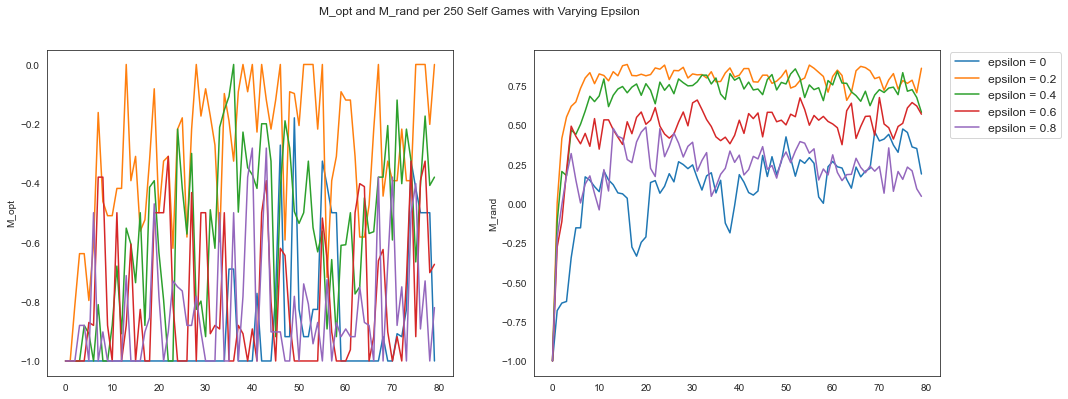

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 6))
for i in range(len(epsilon)):
    ax1.plot(range(len(M_opts_self[i])), M_opts_self[i],label='epsilon = '+ str(epsilon[i]))
    ax2.plot(range(len(M_rands_self[i])), M_rands_self[i],label='epsilon = '+ str(epsilon[i]))
    
ax2.set_ylabel('M_rand')
ax1.set_ylabel('M_opt')
fig.suptitle('M_opt and M_rand per 250 Self Games with Varying Epsilon')
plt.legend(bbox_to_anchor=(1.01, 1.01), fontsize=12)
plt.show()

In [96]:
fig = go.Figure()
for i in [0,1,2,3,4]:
    fig.add_trace(go.Scatter(x=list(range(len(M_opts_self[i]))), y=M_opts_self[i],
                    mode='lines',line = dict(color = colors[i]),
                    name='opt eps = '+ str(epsilon[i]), legendgroup=i+1))
    fig.add_trace(go.Scatter(x=list(range(len(M_rands_self[i]))), y=M_rands_self[i],
                     line = dict(dash='dash',color = colors[i]),
                    name='rand eps = '+ str(epsilon[i]), legendgroup=i+1))
    
fig.update_layout(template="simple_white", width=800,height=500)

fig.show()

## Q17

In [104]:
n_stars = [1,100,1000,5000,10000,20000]

In [105]:
all_training_losses_last = []
M_opts_last =[]
M_rands_last = []
eps = 0.2
eps_opt = 0.4
for n_star in n_stars:
    _,training_loss,M_opt,M_rand,_ = play_games(env,num_episodes,epsilon= eps ,opts_epsilon=eps_opt,batch=True,decay=True,nstar=n_star,test=True,self_play=True)
    all_training_losses_last.append(training_loss)
    M_opts_last.append(M_opt)
    M_rands_last.append(M_rand)

100%|██████████| 20000/20000 [11:41<00:00, 28.50it/s]   


In [120]:
fig = go.Figure()
colors =  ['#ffa822','#6e3d0f','#ff6150','#1ac0c6','#309d15','#4c159d']
for i in [0,2,3,5]:
    fig.add_trace(go.Scatter(x=list(range(len(M_opts_last[i]))), y=M_opts_last[i],
                    mode='lines',line = dict(color = colors[i]),
                    name='Mopt n* = '+ str(n_stars[i]), legendgroup=i+1))
    fig.add_trace(go.Scatter(x=list(range(len(M_rands_last[i]))), y=M_rands_last[i],
                     line = dict(dash='dash',color = colors[i]),
                    name='Mrand n* = '+ str(n_stars[i]), legendgroup=i+1))
    
fig.update_layout(template="simple_white", width=800,height=500)


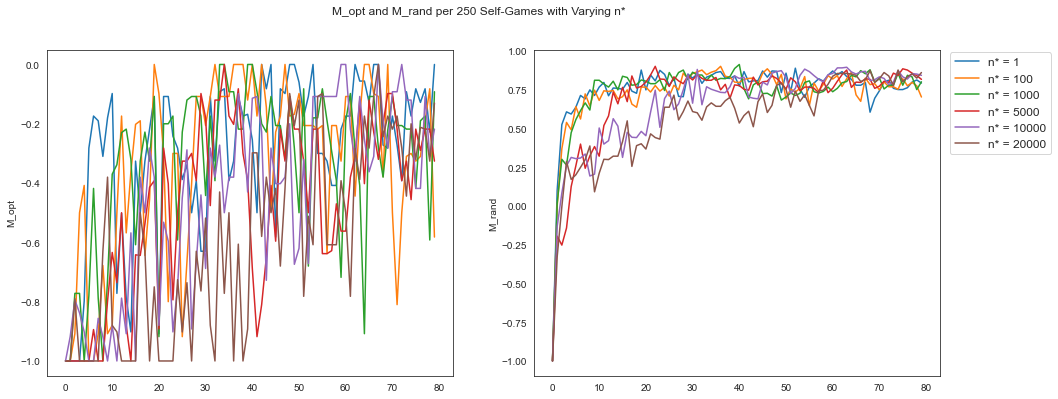

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 6))
for i in range(len(n_stars)):
    ax1.plot(range(len(M_opts_last[i])), M_opts_last[i],label='n* = '+ str(n_stars[i]))
    ax2.plot(range(len(M_rands_last[i])), M_rands_last[i],label='n* = '+ str(n_stars[i]))

ax2.set_ylabel('M_rand')
ax1.set_ylabel('M_opt')
fig.suptitle('M_opt and M_rand per 250 Self-Games with Varying n*')
plt.legend(bbox_to_anchor=(1.01, 1.01), fontsize=12)
plt.show()

n*=1

## Q19

In [ ]:
#_,_,_,_,policy_net=play_games(env,num_episodes,epsilon= 0.2 ,opts_epsilon=0.4,batch=True,decay=False,test=False,self_play=True)
_,_,_,_,policy_net= play_games(env,40*250,epsilon= 0.2 ,opts_epsilon=0.4,batch=True,decay=True,nstar=1000,self_play=True)
   


In [ ]:
def state2array(state):
    s = state.replace('[','').replace(']','')
    tokens = s.split()
    tokens = [float(token) for token in tokens]
    array = np.array(tokens)
    return array

In [ ]:
def taken_Q(state, policy_net):
    array = state2array(state)
    taken_position = []
    for i in range(9):
            if array[i] != 0.:
                taken_position.append(i)
    Q =  policy_net(get_DQN_input(array.reshape(3,3))[None, :]).flatten().detach()
    Q[taken_position] = -10
    return Q

In [ ]:
def array2grid(array, Q):
    indexes_X = [i for i,x in enumerate(array) if x == 1]
    indexes_O = [i for i,x in enumerate(array) if x == -1]
    text = Q.detach().numpy()
    text = np.array([str(round(a, 3)) for a in text])
    text[indexes_X] = 'X'
    text[indexes_O] = 'O'
    return text.reshape(3,3)

In [ ]:
state_1 = '[[ 0. -1.  0.]\n [ 0.  1.  1.]\n [-1. 0.  -1.]]'
state_2 = '[[ 1.  1.  0.]\n [ 1. -1. -1.]\n [-1.  0. -1.]]'
state_3 = '[[ 0.  0.  0.]\n [-1.  1. 0.]\n [ 1. -1.  -1.]]'

Q_1 = taken_Q(state_1, policy_net)
Q_2 = taken_Q(state_2, policy_net)
Q_3 = taken_Q(state_3, policy_net)
text_1 = array2grid(array_1, Q_1)
text_2 = array2grid(array_2, Q_2)
text_3 = array2grid(array_3, Q_3)

In [ ]:
import seaborn as sns

sns.set_theme()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True, gridspec_kw={'width_ratios': [10, 10, 12]})
sns.heatmap(Q_1.reshape(3,3), cmap=cmap, annot=text_1, cbar=False, ax=axes[0], fmt='')
sns.heatmap(Q_2.reshape(3,3), cmap=cmap, annot=text_2, cbar=False, ax=axes[1], fmt='')
sns.heatmap(Q_3.reshape(3,3), cmap=cmap, annot=text_3, ax=axes[2], fmt='')
fig.suptitle('Q-values')
axes[0].set_title('Q_1')
axes[1].set_title('Q_2')
axes[2].set_title('Q_3')
# fig.tight_layout()
fig.subplots_adjust(top=0.86)

plt.show()